# 2024 California Power Sector Emissions
**An Analysis**

#### Author: Paul Junver Soriano

#### Date: March 13, 2025 *(Last Updated)*

## SUBMISSION 1: Proposal
---

## Background

The data is collected by the U.S. Environmental Protection Agency (EPA) Clean Air Markets Division (CAMD). 

The data is made available to the public as part of the agency's regulations for energy generating units (EGUs) to measure and report their emissions. EGUs must also assess their facilities, operations and must perform quality assurance on the data that they collect.

The data used for this analysis is only a subset (for the year 2024, for the state of California) of the general data. As a resident of California, I am interested in learning how EGUs in the state operate and comply to standards set by the EPA. 

Furthermore, the California Green Energy Initiative aims for electric utilities to acquire at least 50% of their electricity from renewable resources by 2030. By analyzing this data, I hope that I can gain some insights on how some of our facilities are working towards this goal.

#### References
* United States Environmental Protection Agency (EPA). “Power Sector Data.” Washington, DC: Office of Atmospheric Protection, Clean Air and Power Division. Available from EPA’s Clean Air Markets Program Data website: https://campd.epa.gov.

* United States Environmental Protection Agency (EPA). “Power Sector Emissions Data Guide.” Washington, DC: Office of Atmospheric Protection, Clean Air and Power Division. Available from EPA’s Clean Air Markets Program Data website: https://campd.epa.gov.

* Megerian, Chris; Panzar, Javier (October 7, 2015). "Gov. Brown signs climate change bill to spur renewable energy, efficiency standards". *Los Angeles Times.* Retrieved March 12, 2025. https://www.latimes.com/politics/la-pol-sac-jerry-brown-climate-change-renewable-energy-20151007-story.html.

## Objective

Some questions that I hope to answer from the data:
1. Which facility in California had the most emissions?
2. Which facility was the most efficient?
3. How much of the facilities still rely on natural gas as primary source of energy?
4. What gas or gases were emitted the most?

## Data

### Dataset

The 2024 California Power Sector Emissions dataset consists of 240 observations, with each observation representing the annual report for each EGU facility and unit. The following data were collected for each observation:


|    | variable                      | type                | description                                 |   
|:--:| :--------                     | :-----:             | :------------                               |
|  1 | `State`                       | categorical         | the state (CA)                              |
|  2 | `Facility Name`               | categorical         | the name of the facility                    |
|  3 | `Facility ID`                 | numeric, discrete   | the ID of the facility                      |
|  4 | `Unit ID`                     | numeric, discrete   | the ID of the unit.                         |
|  5 | `Associated Stacks`           | categorical         | smokestacks associated with the unit        |
|  6 | `Year`                        | numeric, discrete   | the year (2024)                             |
|  7 | `Operating Time Count`        | numeric, discrete   | total hours of facility operation (inc. start up and shut down) |
|  8 | `Sum of the Operating Time`   | numeric, continuous | total hours of electricity-generation operation                    |
|  9 | `Gross Load (MWh)`            | numeric, continuous | amount of electricity produced (in MWh)     |
| 10 | `Steam Load (1000lb)`         | numeric, continuous | amount of steam produced (in 1000lb/hr)     |
| 11 | `SO2 Mass (short tons)`       | numeric, continuous | amount of SO2 emitted (in short tons)       |
| 12 | `SO2 Rate (lbs/mmBtu)`        | numeric, continuous | rate of SO2 emission (in lbs/mmBtu)         |
| 13 | `CO2 Mass (short tons)`       | numeric, continuous | amount C02 emitted (in short tons)          |
| 14 | `CO2 Rate (short tons/mmBtu)` | numeric, continuous | rate of C02 emission (in short tons/mmBtu)  |
| 15 | `NOx Mass (short tons)`       | numeric, continuous | rate of NOx emission (in lbs/mmBtu)         |
| 16 | `NOx Rate (lbs/mmBtu)`        | numeric, continuous | amount NOx emitted (in short tons           |
| 17 | `Heat Input (mmBtu)`          | numeric, continuous | amount of heat input from burning fuel (in mmBtu)|
| 18 | `Primary Fuel Type`           | categorical         | primary fuel used                           |
| 19 | `Secondary Fuel Type`         | categorical         | secondary fuel used (if available)          |
| 20 | `Unit Type`                   | categorical         | type of unit (turbine, boiler, etc.)        |
| 21 | `SO2 Controls`                | categorical         | SO2 control device(s) used (if available)   |
| 22 | `NOx Controls`                | categorical         | NOx control device(s) used (if available)   |
| 23 | `PM Controls`                 | categorical         | PM control device(s) used (if available)    |
| 24 | `Hg Controls`                 | categorical         | Hg control device(s) used (if available)    |
| 25 | `Program Code`                | categorical         | emission control program used               |

> *Notes:*
> * SO2: Sulfur Dioxide
> * CO2: Carbon Dioxide
> * NOx: Nitrogen Oxides (both NO and NO2)
> * PM: Particulate Matter (solid particles in the air)
> * Hg: Mercury
> * `Program Code` codes can be found in [this guide](https://www.epa.gov/system/files/documents/2022-07/CAMD%27s%20Power%20Sector%20Emissions%20Data%20Guide%20-%2007182022.pdf)

### Data Overview

In [23]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Import data
df = pd.read_csv('annual-emissions-2024-ca.csv')

In [25]:
# Check what the data looks like
df.head()

,State,Facility Name,Facility ID,Unit ID,Associated Stacks,Year,Operating Time Count,Sum of the Operating Time,Gross Load (MWh),Steam Load (1000 lb),...,NOx Rate (lbs/mmBtu),Heat Input (mmBtu),Primary Fuel Type,Secondary Fuel Type,Unit Type,SO2 Controls,NOx Controls,PM Controls,Hg Controls,Program Code
0,CA,Moss Landing Power Plant,260,1A,NaN,2024,4926,4632.36,1057993.53,NaN,...,0.0203,7656029.272,Pipeline Natural Gas,NaN,Combined cycle,NaN,Dry Low NOx Burners|Selective Catalytic Reduction,NaN,NaN,ARP
1,CA,Moss Landing Power Plant,260,2A,NaN,2024,4553,4254.06,988453.85,NaN,...,0.0202,7096048.495,Pipeline Natural Gas,NaN,Combined cycle,NaN,Dry Low NOx Burners|Selective Catalytic Reduction,NaN,NaN,ARP
2,CA,Moss Landing Power Plant,260,3A,NaN,2024,5290,4958.61,1113582.95,NaN,...,0.0186,8092235.611,Pipeline Natural Gas,NaN,Combined cycle,NaN,Dry Low NOx Burners|Selective Catalytic Reduction,NaN,NaN,ARP
3,CA,Moss Landing Power Plant,260,4A,NaN,2024,4433,4123.27,952838.89,NaN,...,0.0211,6780931.376,Pipeline Natural Gas,NaN,Combined cycle,NaN,Dry Low NOx Burners|Selective Catalytic Reduction,NaN,NaN,ARP
4,CA,Cabrillo Power I Encina Power Station,302,10,NaN,2024,673,486.90,32986.10,NaN,...,0.0177,321746.779,Pipeline Natural Gas,NaN,Combustion turbine,NaN,Water Injection|Selective Catalytic Reduction,NaN,NaN,ARP


In [26]:
# Check data shape
df.shape

(240, 25)

In [27]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        240 non-null    object 
 1   Facility Name                240 non-null    object 
 2   Facility ID                  240 non-null    int64  
 3   Unit ID                      240 non-null    object 
 4   Associated Stacks            2 non-null      object 
 5   Year                         240 non-null    int64  
 6   Operating Time Count         240 non-null    int64  
 7   Sum of the Operating Time    240 non-null    float64
 8   Gross Load (MWh)             233 non-null    float64
 9   Steam Load (1000 lb)         0 non-null      float64
 10  SO2 Mass (short tons)        236 non-null    float64
 11  SO2 Rate (lbs/mmBtu)         236 non-null    float64
 12  CO2 Mass (short tons)        236 non-null    float64
 13  CO2 Rate (short tons

### Data Cleaning

#### Cleaning the columns

In [41]:
# Since this dataset is for the year 2024 and for the state of California, those columns can be dropped.
clean_df = df.drop(['Year', 'State'], axis=1)
print(f"# of cols before: {len(df.columns)} \n # of cols after: {len(clean_df.columns)}")

# of cols before: 25 
 # of cols after: 23


In [32]:
# Check for null values
df.isna().sum()

State                            0
Facility Name                    0
Facility ID                      0
Unit ID                          0
Associated Stacks              238
Year                             0
Operating Time Count             0
Sum of the Operating Time        0
Gross Load (MWh)                 7
Steam Load (1000 lb)           240
SO2 Mass (short tons)            4
SO2 Rate (lbs/mmBtu)             4
CO2 Mass (short tons)            4
CO2 Rate (short tons/mmBtu)      4
NOx Mass (short tons)            4
NOx Rate (lbs/mmBtu)             4
Heat Input (mmBtu)               4
Primary Fuel Type                0
Secondary Fuel Type            219
Unit Type                        0
SO2 Controls                   239
NOx Controls                     7
PM Controls                    239
Hg Controls                    240
Program Code                     0
dtype: int64

In [61]:
# Change BMI into a categorical type
df['BMI'] = df['BMI'].astype('category')
df.info()
df['BMI'].cat.categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                400 non-null    int64   
 1   Gender                   400 non-null    object  
 2   Age                      400 non-null    int64   
 3   Occupation               400 non-null    object  
 4   Sleep Duration           400 non-null    float64 
 5   Sleep Quality            400 non-null    float64 
 6   Daily Physical Activity  400 non-null    int64   
 7   Stress Level             400 non-null    int64   
 8   BMI                      400 non-null    category
 9   Blood Pressure           400 non-null    object  
 10  Heart Rate               400 non-null    int64   
 11  Daily Steps              400 non-null    int64   
 12  Sleep Disorder           110 non-null    object  
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 38.

Index(['Normal', 'Obese', 'Overweight', 'Underweight'], dtype='object')

___

In [28]:
# Check dataframe distributions
df.describe()

,Facility ID,Year,Operating Time Count,Sum of the Operating Time,Gross Load (MWh),Steam Load (1000 lb),SO2 Mass (short tons),SO2 Rate (lbs/mmBtu),CO2 Mass (short tons),CO2 Rate (short tons/mmBtu),NOx Mass (short tons),NOx Rate (lbs/mmBtu),Heat Input (mmBtu),Hg Controls
count,240.000000,240.0,240.000000,240.000000,2.330000e+02,0.0,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,2.360000e+02,0.0
mean,35822.954167,2024.0,2130.095833,2028.454083,3.180573e+05,NaN,0.705911,0.001093,139726.923377,0.059397,9.353343,0.020652,2.345048e+06,NaN
std,26044.440663,0.0,2353.352334,2352.430640,4.932627e+05,NaN,1.040168,0.001697,206953.102536,0.002984,13.768479,0.020726,3.470220e+06,NaN
min,260.000000,2024.0,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000200,7.800000,0.058000,0.001000,0.001600,1.332000e+02,NaN
25%,422.000000,2024.0,335.500000,260.635000,1.151914e+04,NaN,0.035000,0.001000,6867.950750,0.059000,0.815500,0.009700,1.159282e+05,NaN
50%,55509.000000,2024.0,837.500000,687.250000,4.836199e+04,NaN,0.126500,0.001000,26291.411000,0.059100,1.875500,0.014850,4.442025e+05,NaN
75%,56298.000000,2024.0,3995.500000,3877.497500,4.575571e+05,NaN,1.066500,0.001000,211255.355000,0.059300,14.158750,0.021925,3.554800e+06,NaN
max,60698.000000,2024.0,8328.000000,8323.190000,1.984036e+06,NaN,4.095000,0.027000,823774.862000,0.103100,106.832000,0.173700,1.364977e+07,NaN


<Figure size 1000x500 with 0 Axes>

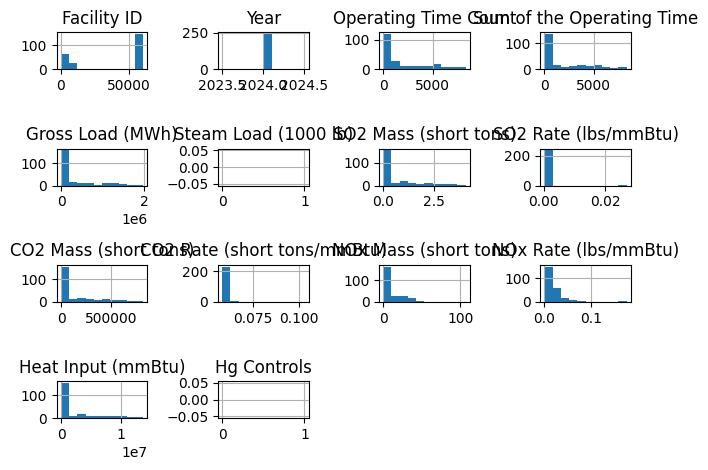

In [29]:
# Visualize distributions
plt.figure(figsize=(10, 5))
df.hist()
plt.tight_layout()
plt.show()

<Axes: >

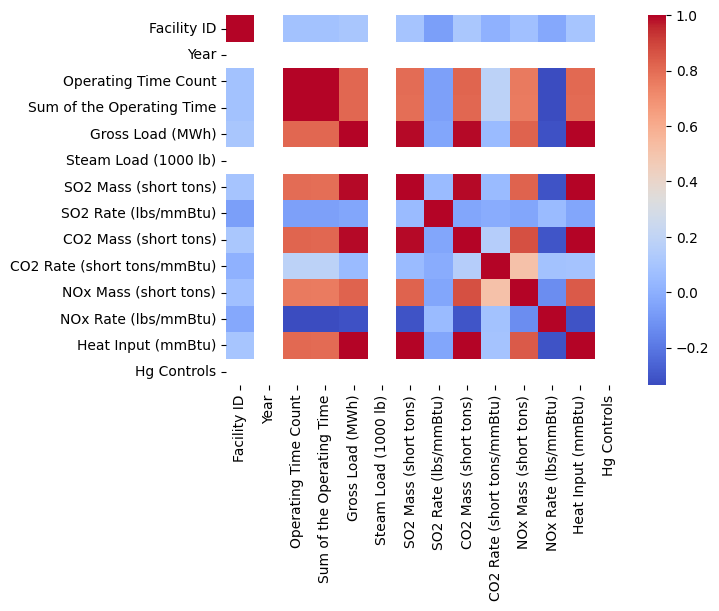

In [11]:
# Check variable correlations (for numeric variables)
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

___
## SUBMISSION 2: Exploratory Data Analysis (EDA)

## SUBMISSION 2: Hypothesis Testing